In [12]:
import scanpy as sc
import anndata as ad
import numpy as np
sys.path.append('/homefolder/deborah/Git/Spatial_transcriptomics_rep/src')
from _utils import plot_cell_type
from _utils import plot_spatial_gene

In [3]:
adata_35B = sc.read_h5ad('/homefolder/deborah/Rnd/projects/spatial/vizgen/Bioivt_pilot/Samples_annotation/HuOvarianCa-1344735B_annotated.hdf5')

In [4]:
adata_46B = sc.read_h5ad('/homefolder/deborah/Rnd/projects/spatial/vizgen/Bioivt_pilot/Samples_annotation/HuOvarianCa-1317546B_annotated.hdf5')

Shifting one sample coordinates for combined analysis

In [5]:
adata_46B.obs['center_x'] = adata_46B.obs['center_x'] + 10000 
adata_46B.obs['center_y'] = adata_46B.obs['center_y'] + 10000 

In [6]:
adata_46B.obs['Sample'] = '46B-S1'
adata_35B.obs["Sample"] = '35B-S2'

In [10]:
adata_combined = ad.concat([adata_46B, adata_35B], axis=0)


In [13]:
coordinates =np.stack((adata_combined.obs['center_x'], adata_combined.obs['center_y']), axis=1)
adata_combined.obsm['spatial'] = coordinates

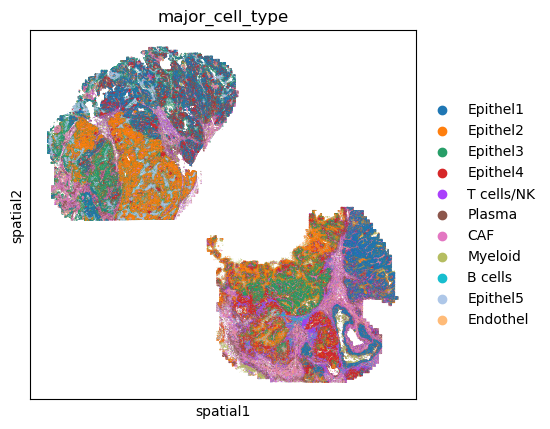

In [14]:
sc.pl.spatial(adata_combined,color=['major_cell_type'], spot_size=30)

Combined epithel analysis

In [15]:
adata_combined_epithel = adata_combined[adata_combined.obs['major_cell_type'].str.contains('Epithel')]

In [16]:
sc.tl.pca(adata_combined_epithel, svd_solver='arpack')
sc.pp.neighbors(adata_combined_epithel, n_neighbors=15, n_pcs=15)
sc.tl.umap(adata_combined_epithel)

In [ ]:
sc.tl.leiden(adata_combined_epithel, resolution=0.3)

In [ ]:
plot_category(adata_combined_epithel,'leiden')